Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '5e03a7a2832a17ee33585ea4'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 532778

before = 3
after = 3

In [22]:
anom.loc[ind - 730 * before + 745:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
531333,2022-01-17 23:51:54,5e03a7a2832a17ee33585ea4,"[230.694,230.373,230.835]","[0.2,0.1,0.1]","[10.44,-0.19,0]","[43988.09896,40141.40694,40450.88144]","[339.55136,166.151,192.81233]","[45593.32907,41482.09225,41756.63522]","[4127.0188,692.3512,576.7166]",10.25,...,"[45593.32907,41482.09225,41756.63522]","[4127.0188,692.3512,576.7166]",10.68,124580.38734,698.51469,128832.05654,5396.0866,"[-75.8,-90.4,-89.9]","[0,-120.1,119.7]",49.98
531334,2022-01-17 23:53:54,5e03a7a2832a17ee33585ea4,"[230.764,230.538,230.836]","[0.2,0.1,0.1]","[9.75,-0.19,0]","[43988.0993,40141.40694,40450.88144]","[339.55136,166.151,192.81233]","[45593.33045,41482.0932,41756.63617]","[4127.0188,692.3512,576.7166]",9.56,...,"[45593.33045,41482.0932,41756.63617]","[4127.0188,692.3512,576.7166]",10.5,124580.38768,698.51469,128832.05982,5396.0866,"[-75.8,-90.3,-90]","[0,-120.1,119.7]",49.98
531335,2022-01-17 23:55:54,5e03a7a2832a17ee33585ea4,"[230.754,230.623,230.683]","[0.2,0.1,0.1]","[9.81,-0.13,0]","[43988.09963,40141.40694,40450.88144]","[339.55136,166.151,192.81233]","[45593.33181,41482.09413,41756.63711]","[4127.0188,692.3512,576.7166]",9.68,...,"[45593.33181,41482.09413,41756.63711]","[4127.0188,692.3512,576.7166]",9.75,124580.38801,698.51469,128832.06305,5396.0866,"[-76.8,-90.2,-90]","[0,-120.1,119.8]",49.96
531336,2022-01-17 23:57:54,5e03a7a2832a17ee33585ea4,"[230.812,230.716,230.863]","[0.2,0.1,0.1]","[9.75,-0.13,0]","[43988.09996,40141.40694,40450.88144]","[339.55136,166.151,192.81233]","[45593.3332,41482.0951,41756.63808]","[4127.0188,692.3512,576.7166]",9.62,...,"[45593.3332,41482.0951,41756.63808]","[4127.0188,692.3512,576.7166]",9.75,124580.38834,698.51469,128832.06638,5396.0866,"[-77,-90.1,-90]","[0,-120.1,119.8]",49.99
531337,2022-01-17 23:59:54,5e03a7a2832a17ee33585ea4,"[230.944,230.764,230.978]","[0.2,0.1,0.1]","[9.75,-0.13,0]","[43988.10028,40141.40694,40450.88144]","[339.55136,166.151,192.81233]","[45593.33454,41482.09603,41756.63902]","[4127.0188,692.3512,576.7166]",9.62,...,"[45593.33454,41482.09603,41756.63902]","[4127.0188,692.3512,576.7166]",9.68,124580.38866,698.51469,128832.06959,5396.0866,"[-77,-90.2,-90.1]","[0,-120.2,119.7]",49.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534934,2022-01-22 23:53:54,5e03a7a2832a17ee33585ea4,"[231.277,230.976,231.15]","[0.2,0.1,0.1]","[10,-0.19,0]","[44372.5419,40493.80211,40803.77953]","[341.36509,166.15622,192.81239]","[45990.84869,41845.37778,42120.06907]","[4158.7673,696.429,578.1729]",9.81,...,"[45990.84869,41845.37778,42120.06907]","[4158.7673,696.429,578.1729]",10.07,125670.12354,700.3336999999999,129956.29554,5433.369200000001,"[-76.6,-90.4,-89.9]","[0,-120.2,119.7]",49.98
534935,2022-01-22 23:55:54,5e03a7a2832a17ee33585ea4,"[231.18,231.115,230.869]","[0.2,0.1,0.1]","[10.5,-0.25,0]","[44372.54223,40493.80211,40803.77953]","[341.36509,166.15622,192.81239]","[45990.85007,41845.37875,42120.07004]","[4158.7673,696.429,578.1729]",10.25,...,"[45990.85007,41845.37875,42120.07004]","[4158.7673,696.429,578.1729]",10.37,125670.12387,700.3336999999999,129956.29886,5433.369200000001,"[-76,-90.3,-89.9]","[0,-120,119.9]",49.98
534936,2022-01-22 23:57:54,5e03a7a2832a17ee33585ea4,"[230.983,230.728,231.025]","[0.2,0.1,0.1]","[10.63,-0.25,0.06]","[44372.54259,40493.80211,40803.77953]","[341.36509,166.15622,192.81239]","[45990.85145,41845.3797,42120.07099]","[4158.7673,696.429,578.1729]",10.44,...,"[45990.85145,41845.3797,42120.07099]","[4158.7673,696.429,578.1729]",10.81,125670.12423,700.3336999999999,129956.30214,5433.369200000001,"[-75.4,-90.5,-89.9]","[0,-120.1,119.7]",49.96
534937,2022-01-22 23:59:54,5e03a7a2832a17ee33585ea4,"[231.053,230.857,230.975]","[0.2,0.1,0.1]","[10.88,-0.25,0]","[44372.54294,40493.80211,

### Оригинальные данные, одна размерность, без EMD
Трейн на всех

In [54]:
n_neigh = 10

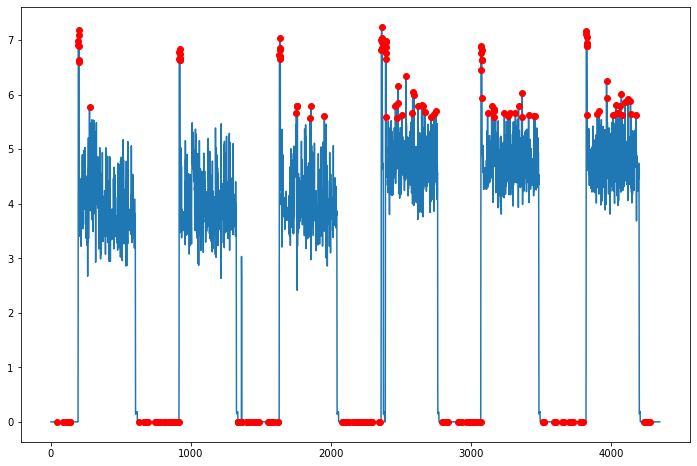

In [4]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)


### Оригинальные данные, одна размерность, с EMD
Трейн на всех

749
0 749
195 604 0
1469
749 1469
916 1363 1
2189
1469 2189
1632 2044 2
2909
2189 2909
2360 2764 3
3629
2909 3629
3072 3486 4
4349
3629 4349
3824 4203 5


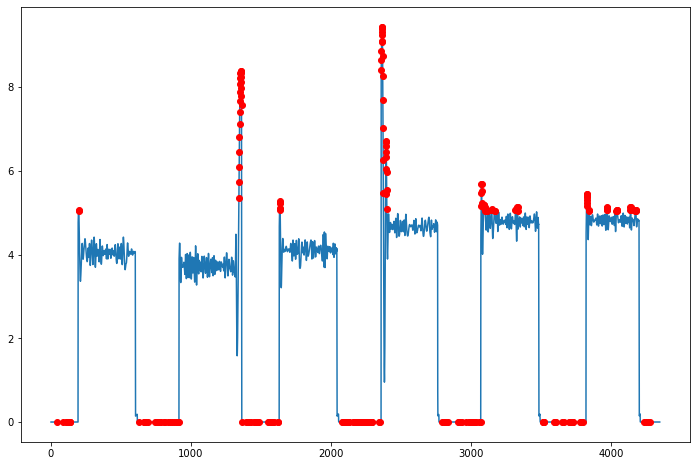

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

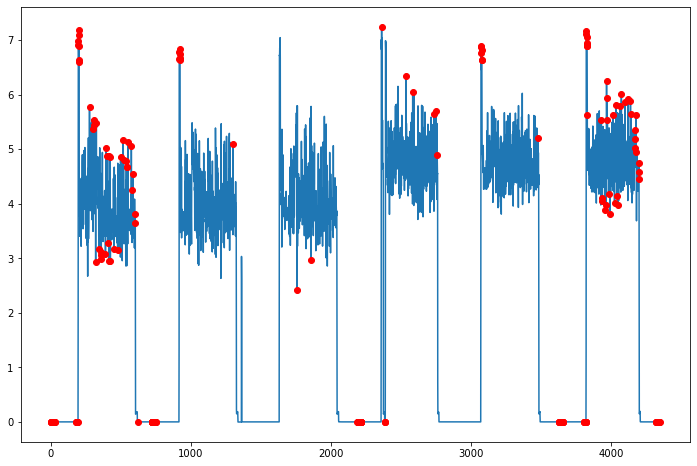

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

749
0 749
195 604 0
1469
749 1469
916 1363 1
2189
1469 2189
1632 2044 2
2909
2189 2909
2360 2764 3
3629
2909 3629
3072 3486 4
4349
3629 4349
3824 4203 5


/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


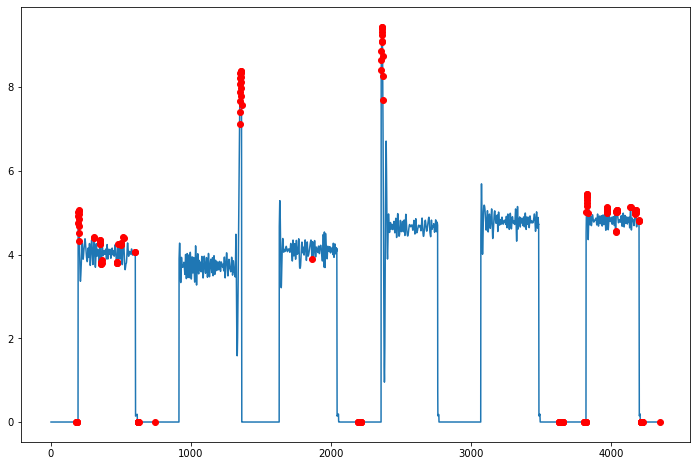

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4


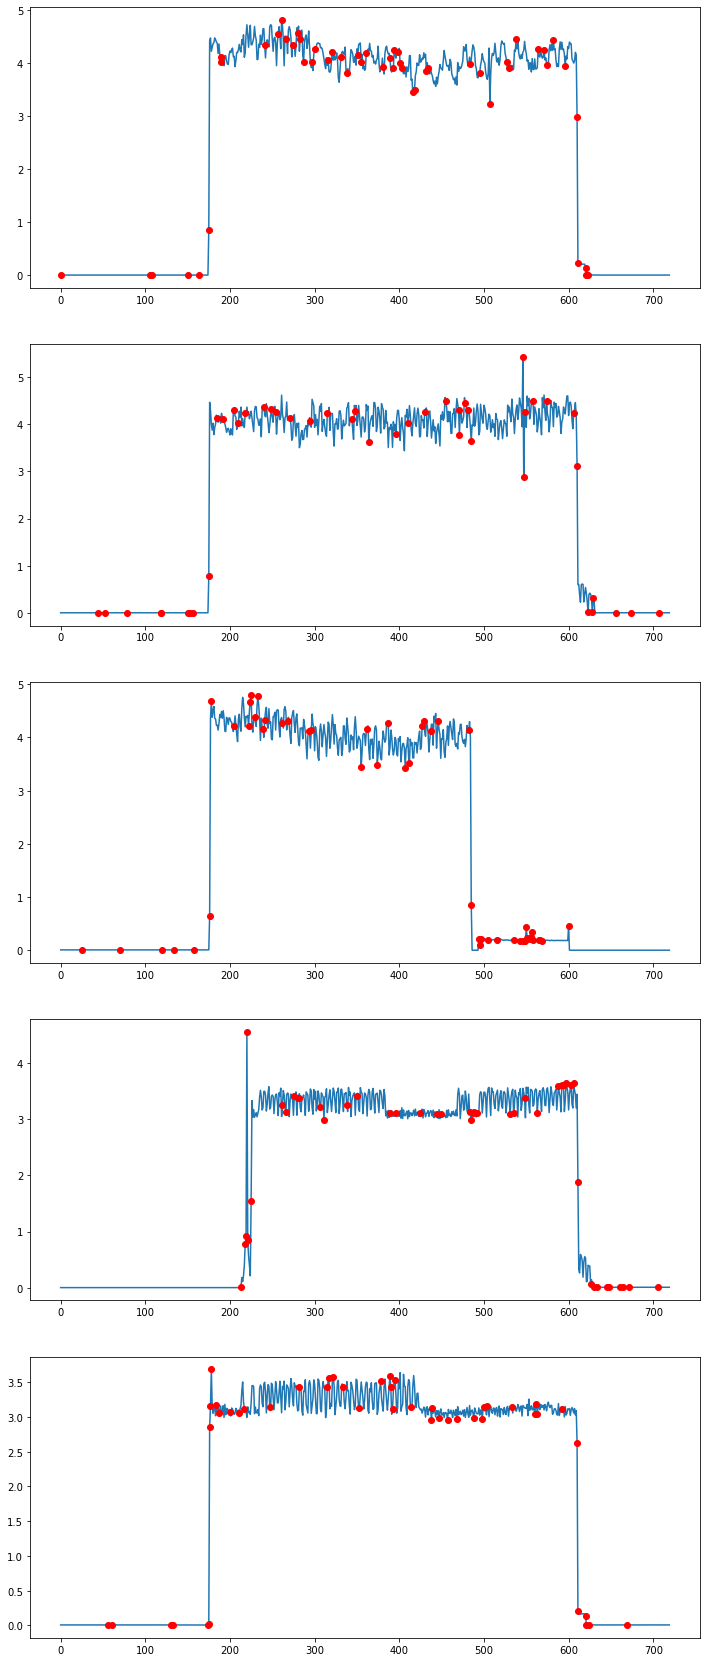

In [50]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  


fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red', zorder=1)
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4
[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4
(5, 720)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


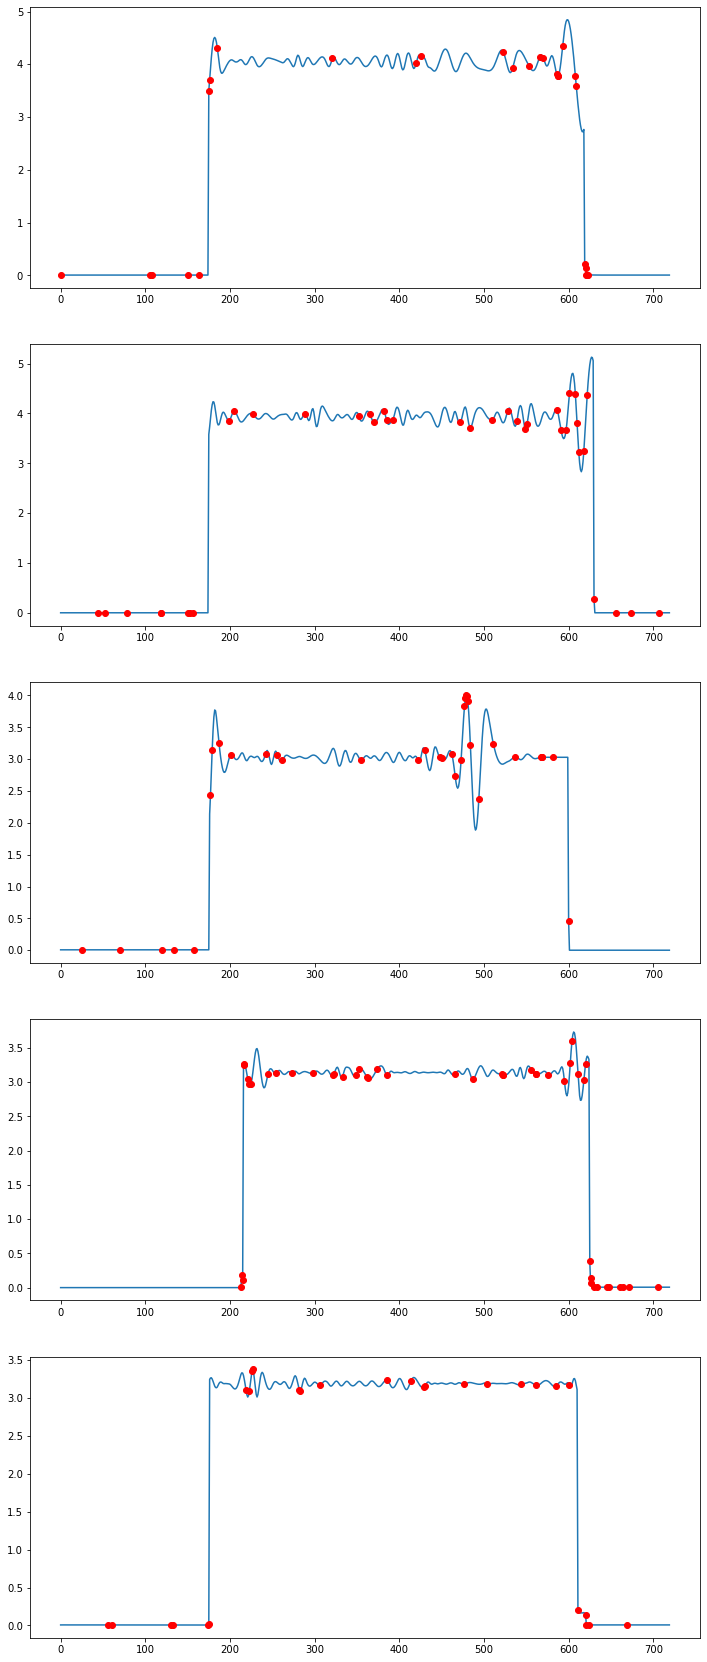

In [51]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day, zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red', zorder=1)
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(5, 720, 5)


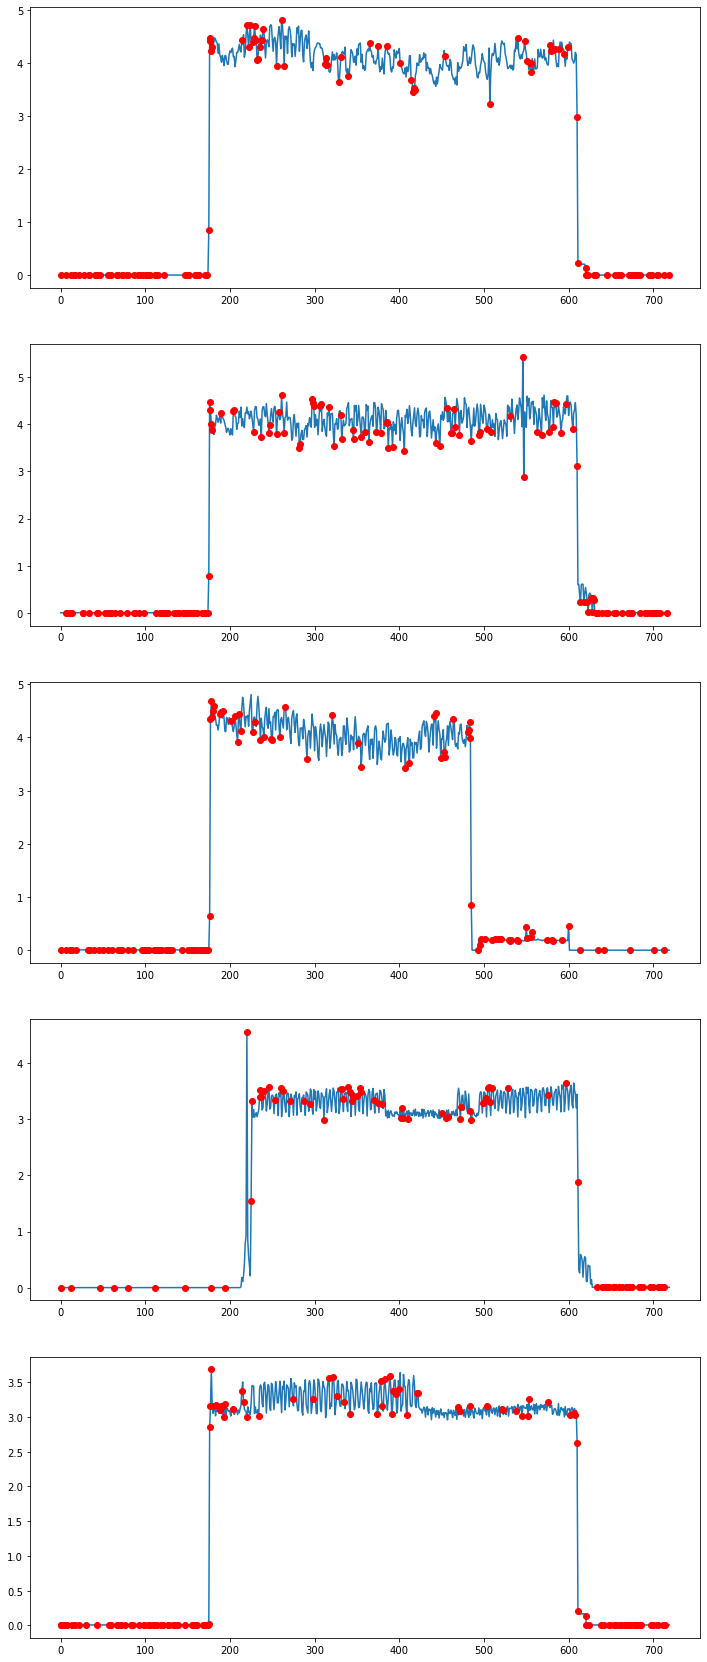

In [52]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
model = LOF(n_neighbors=n_neigh) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)

    ax[i].plot(np.arange(len(day)), day[:, 0], zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red', zorder=1)
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4
(5, 720, 5)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


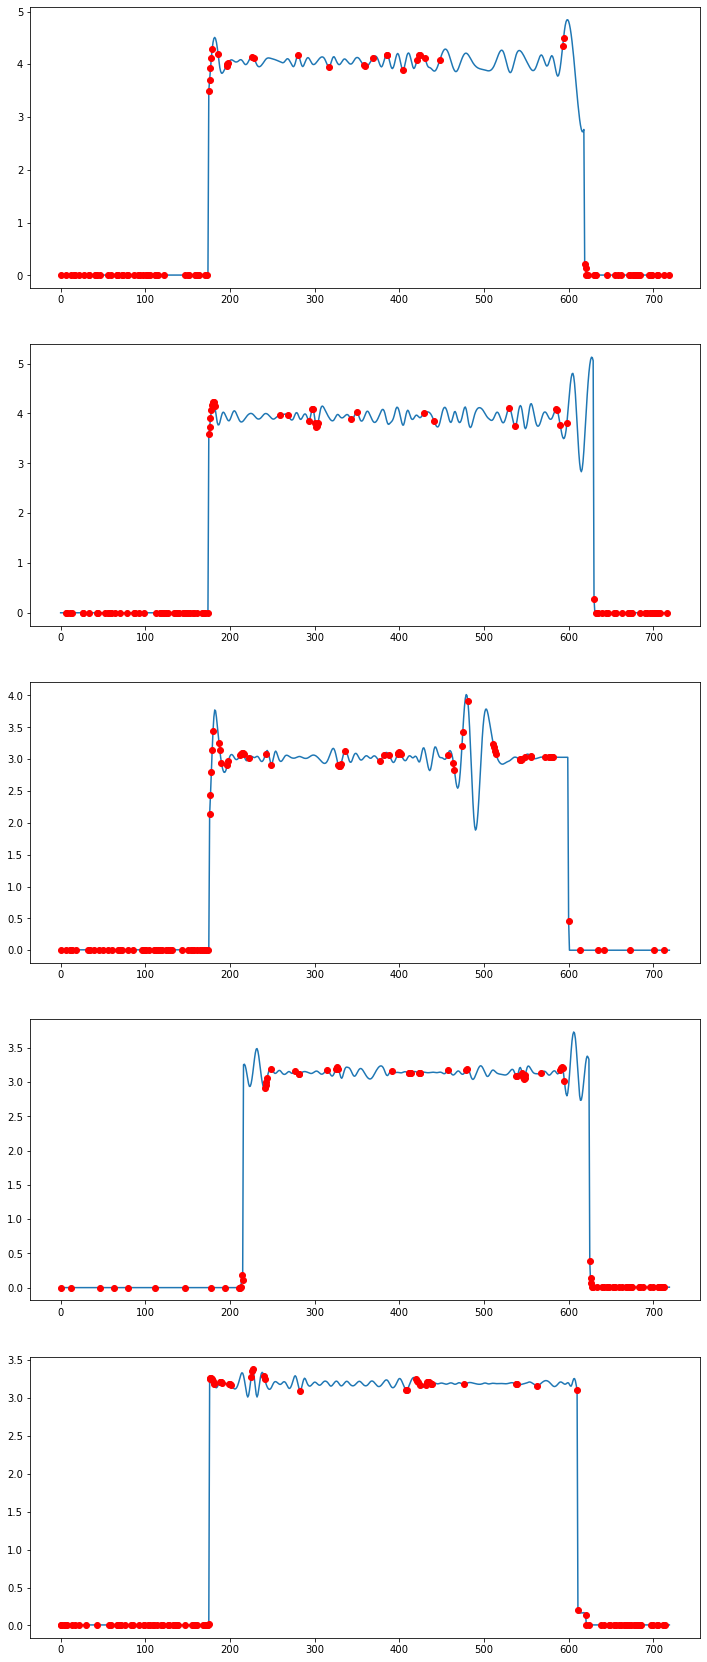

In [53]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))

model = LOF(n_neighbors=n_neigh)  

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    preds = model.fit_predict(day)
    ax[i].plot(np.arange(len(day)), day[:, 0], zorder=0)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red', zorder=1)
    i += 1

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

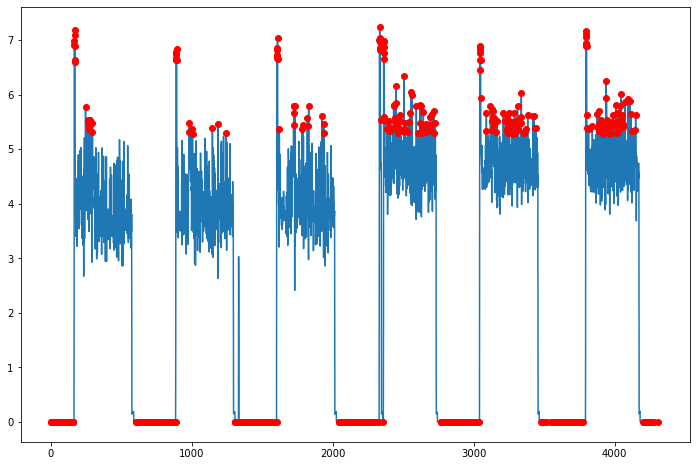

In [10]:
df = get_data(anom.loc[ind - 720 *before + 720:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

[ 719 1439]
719
0 719
166 613 0
1439
719 1439
882 1294 1
[ 719 1439 2159 2879 3599 4319]
719
0 719
165 574 0
1439
719 1439
886 1333 1
2159
1439 2159
1602 2014 2
2879
2159 2879
2330 2734 3
3599
2879 3599
3042 3456 4
4319
3599 4319


/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


3794 4173 5


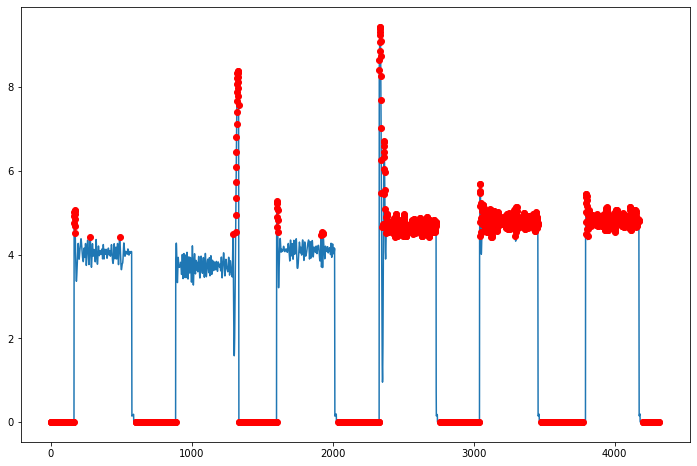

In [9]:
df = get_data(anom.loc[ind - 720 *before + 720:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 720*before:ind + 720 * after ].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

### Суточные данные, одна размерность, с EMD 
Трейн на норм

[ 719 1439 2159]
719
0 719
165 574 0
1439
719 1439
886 1333 1
2159
1439 2159
1602 2014 2
[ 719 1439 2159]
719 1439 0
1439 2159 1
(2, 720)
[ 719 1439 2159 2879 3599 4319]
719
0 719
165 574 0
1439
719 1439
886 1333 1
2159
1439 2159
1602 2014 2
2879
2159 2879
2330 2734 3
3599
2879 3599


/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


3042 3456 4
4319
3599 4319
3794 4173 5
[ 719 1439 2159 2879 3599 4319]
719 1439 0
1439 2159 1
2159 2879 2
2879 3599 3
3599 4319 4


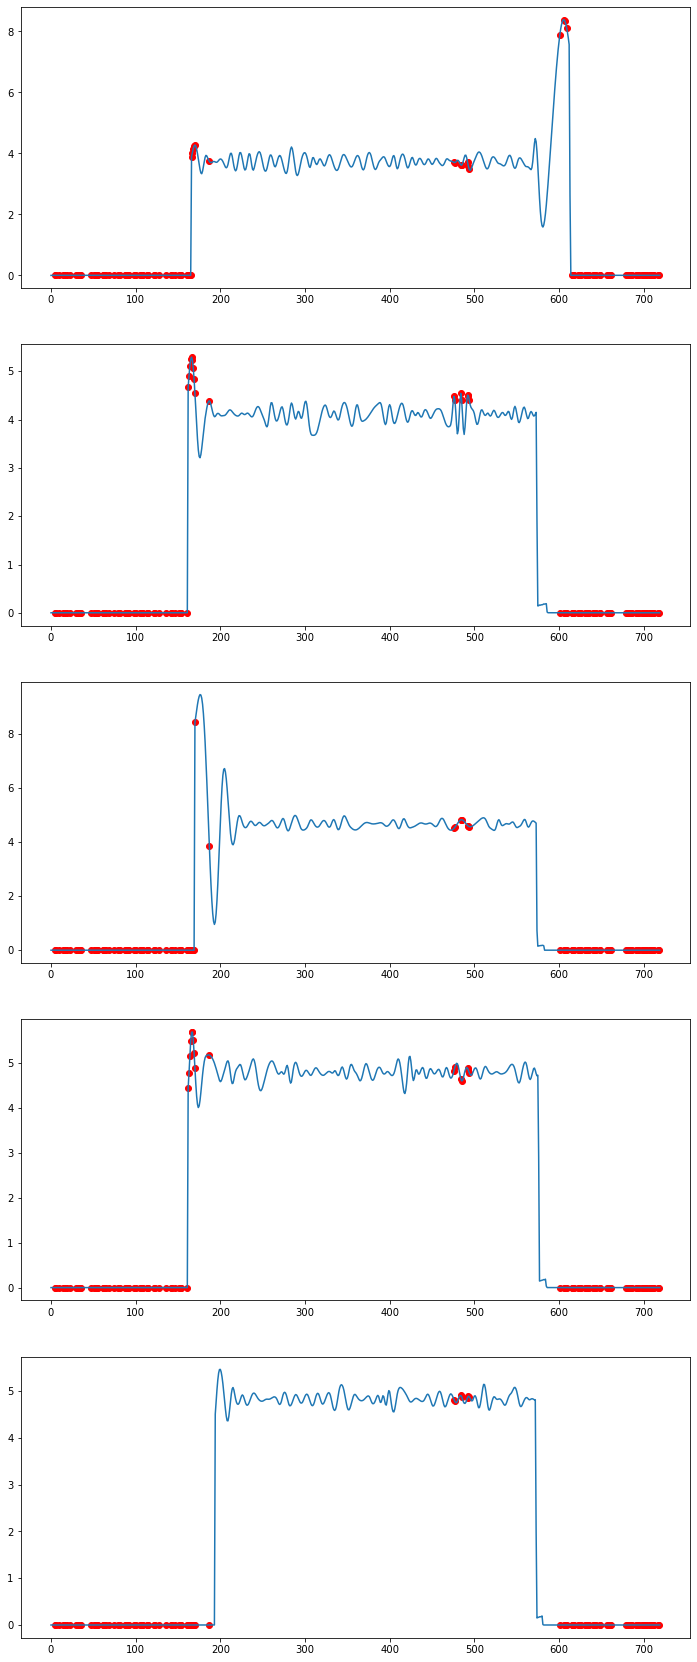

In [11]:
df = get_data(anom.loc[ind - 720 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[ 719 1439 2159 2879 3599 4319]
719 1439 0
1439 2159 1
2159 2879 2
2879 3599 3
3599 4319 4


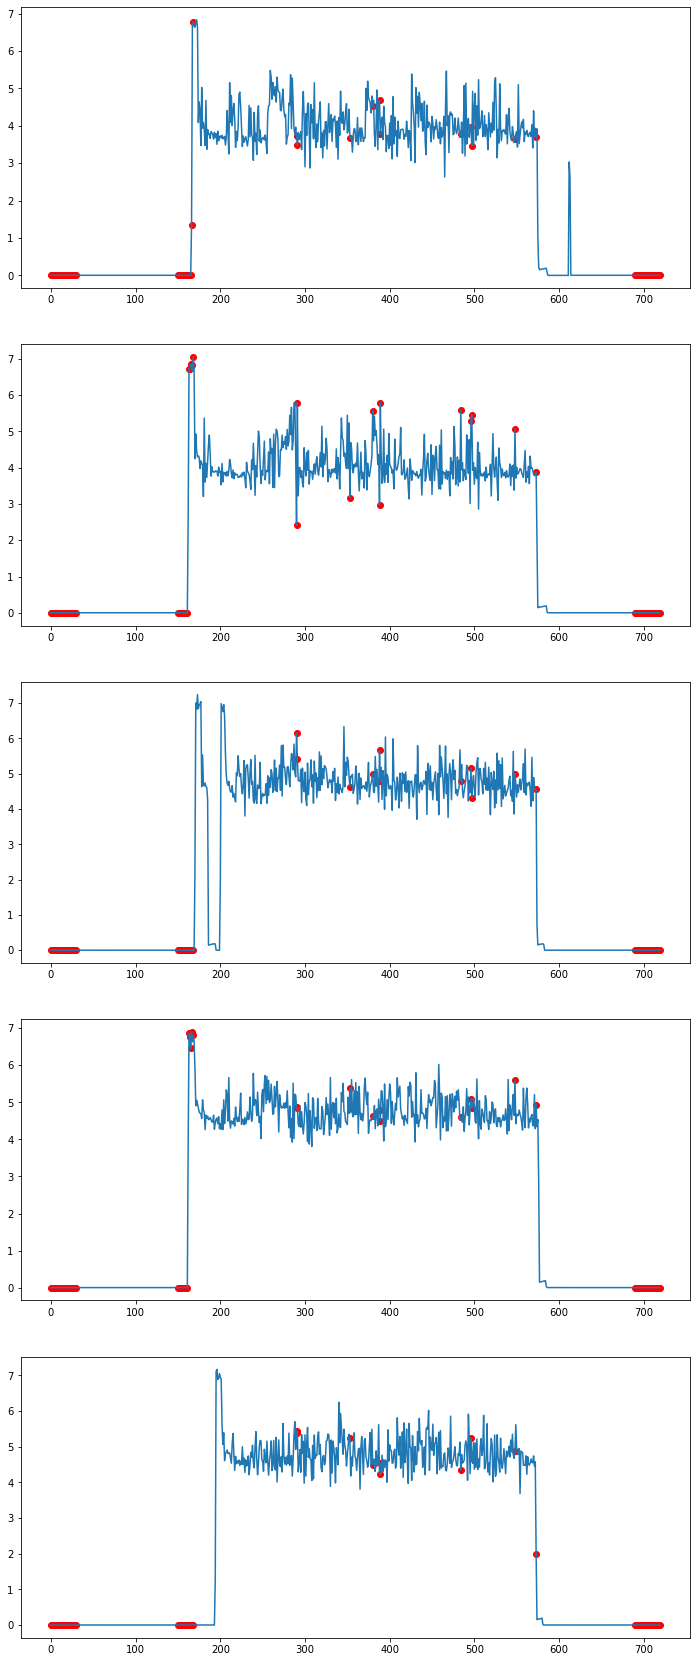

In [12]:
df = get_data(anom.loc[ind - 720 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 720 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 2)
Трейн на норм

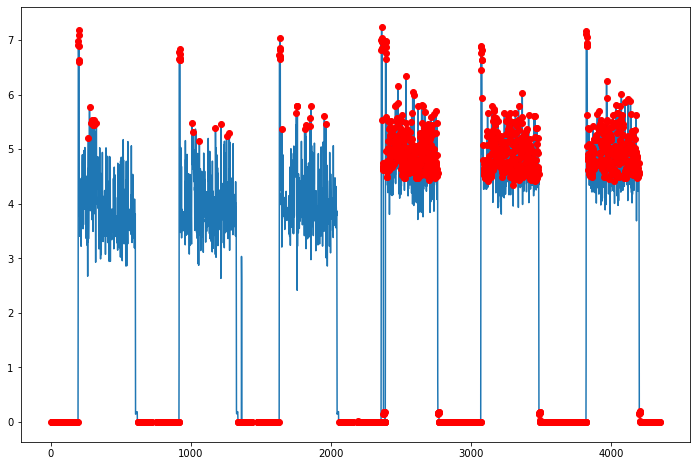

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=2)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 5)
Трейн на норм

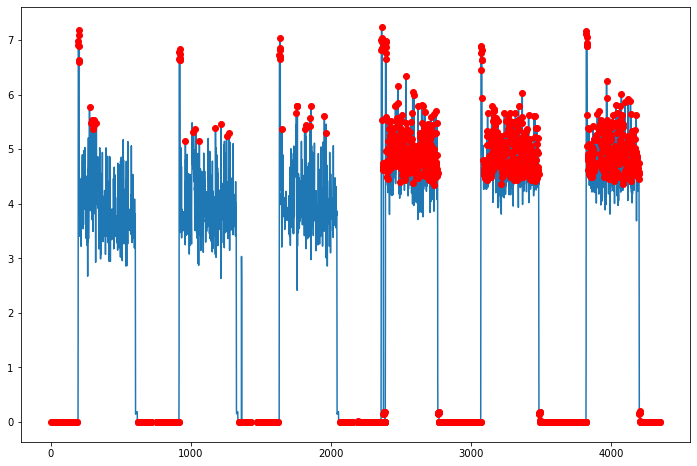

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=5)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, без EMD (интервал 15)
Трейн на норм

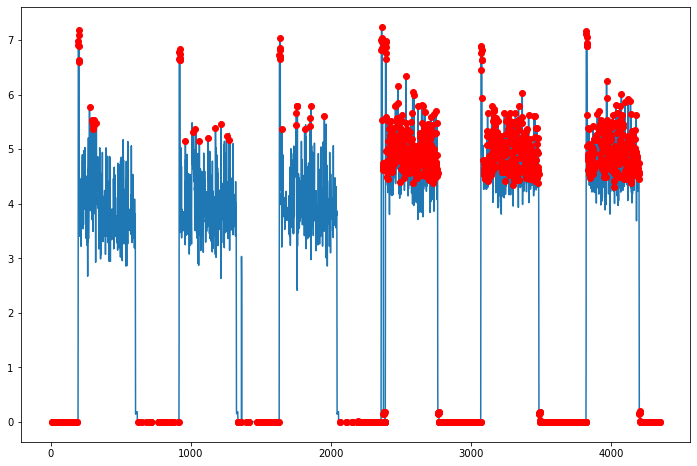

In [9]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi_intervals', intervals=15)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


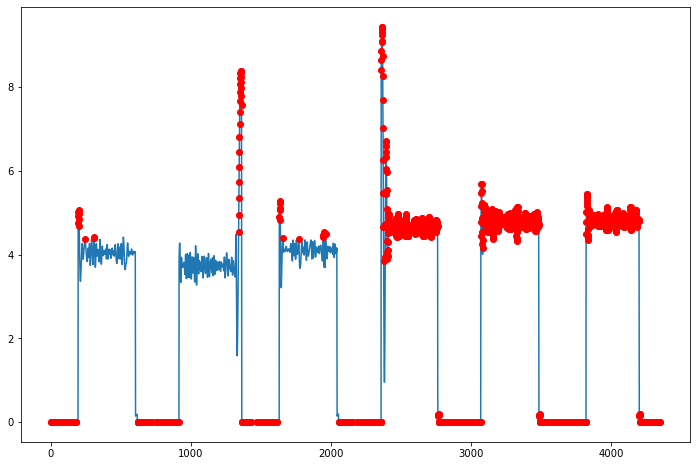

In [10]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=2)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


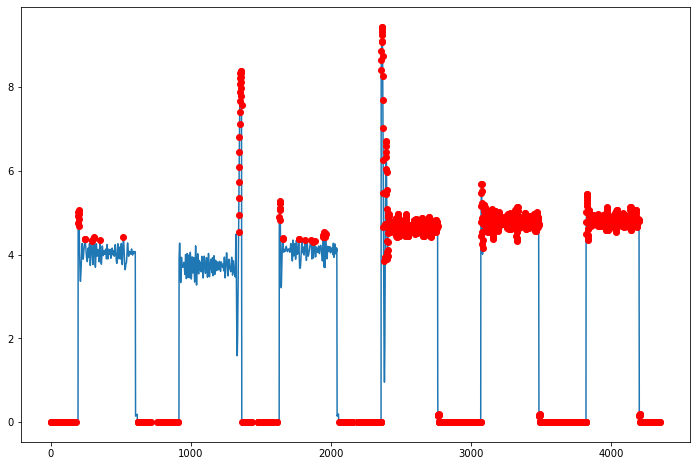

In [11]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=5)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Оригинальные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


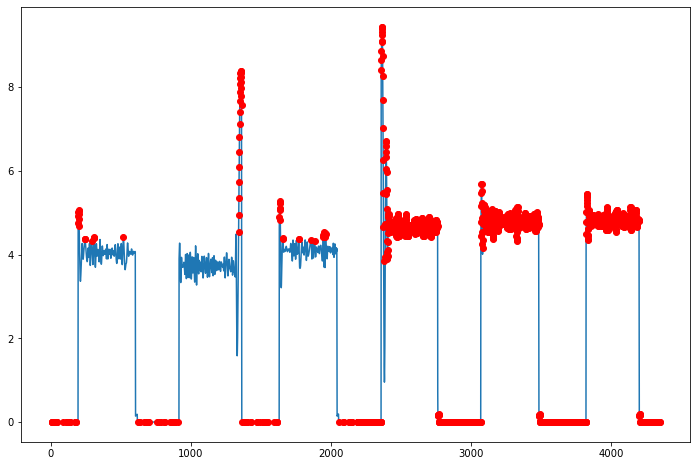

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi_intervals', intervals=15)[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

### Суточные данные, бинарная мульти размерность, без EMD (интервал 2)
Трейн на норм

[  29  749 1469 2189]
[  29  749 1469 2189 2909 3629 4349]


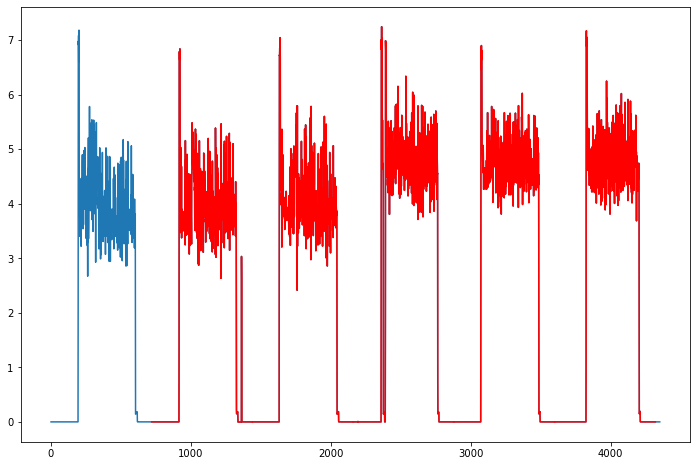

In [29]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

### Суточные данные, бинарная мульти размерность, без EMD (интервал 5)
Трейн на норм

[  29  749 1469 2189]
[  29  749 1469 2189 2909 3629 4349]


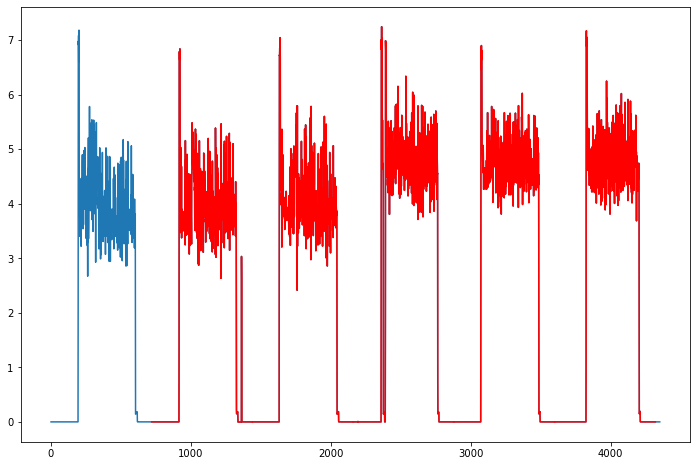

In [30]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

### Суточные данные, бинарная мульти размерность, без EMD (интервал 15)
Трейн на норм

[  29  749 1469 2189]
[  29  749 1469 2189 2909 3629 4349]


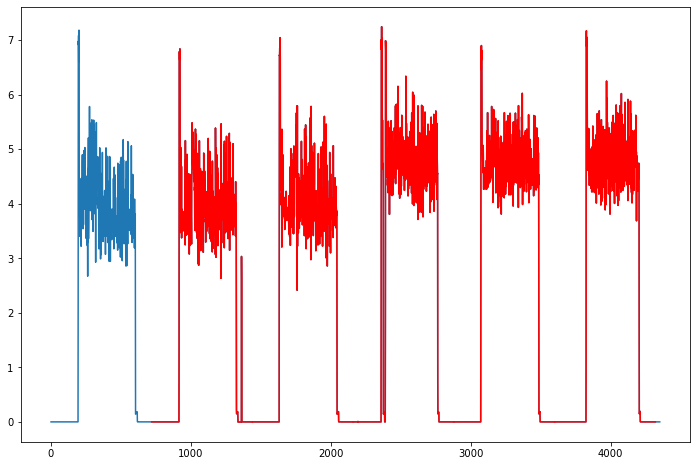

In [31]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

### Суточные данные, бинарная мульти размерность, с EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  29  749 1469 2189]
[  29  749 1469 2189 2909 3629 4349]


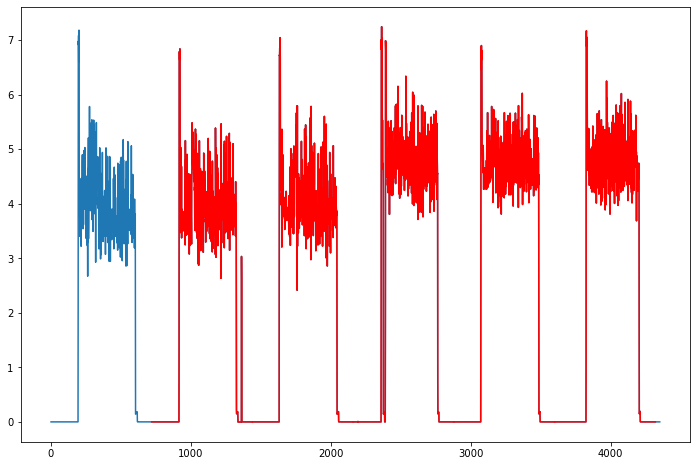

In [32]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

### Суточные данные, бинарная мульти размерность, с EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  29  749 1469 2189]
[  29  749 1469 2189 2909 3629 4349]


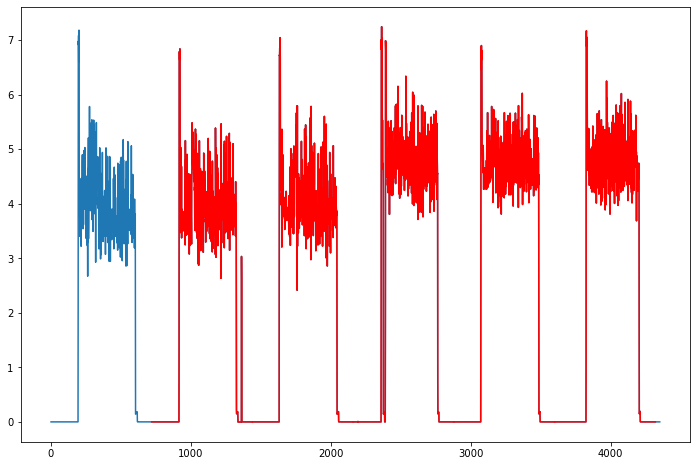

In [33]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

### Суточные данные, бинарная мульти размерность, с EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/OCSVM/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  29  749 1469 2189]
[  29  749 1469 2189 2909 3629 4349]


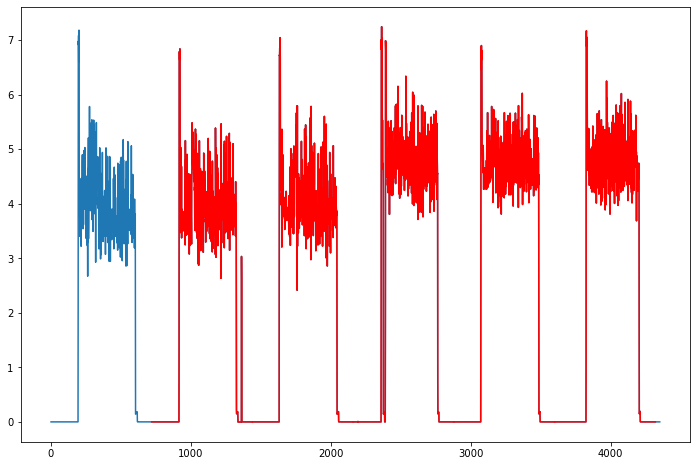

In [34]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')